In [13]:
from src.utils import gallery_specs, gallery_notations
from src.tokens import load_tokens
import random
from src.distances import dmat_and_order
import numpy as np
import plotly.express as px

random.seed(42)

In [14]:
gallery = "movies"
distance = "levenshtein"

In [15]:
all_specs = gallery_specs(gallery)
tokens = load_tokens()

In [17]:
notations = []
remoteness = []
vocab = []
for i in range(1000):
  sample = random.choices(all_specs, k=len(all_specs))
  for notation in gallery_notations(gallery):
    notations.append(notation)
    dmat, dmat_sym, order = dmat_and_order(gallery, notation, distance)
    sample_idx = np.array([order.index(s) for s in sample])
    remoteness.append(np.mean(np.median(dmat_sym[sample_idx][:,sample_idx], axis=1)))
    vocab.append(tokens.query("gallery == @gallery and notation == @notation and spec in @sample")["token"].nunique())

In [29]:
px.density_contour(x=vocab, y=remoteness, color=notations, width=800, height=800, labels=dict(y='mean remoteness', x='vocabulary size'))

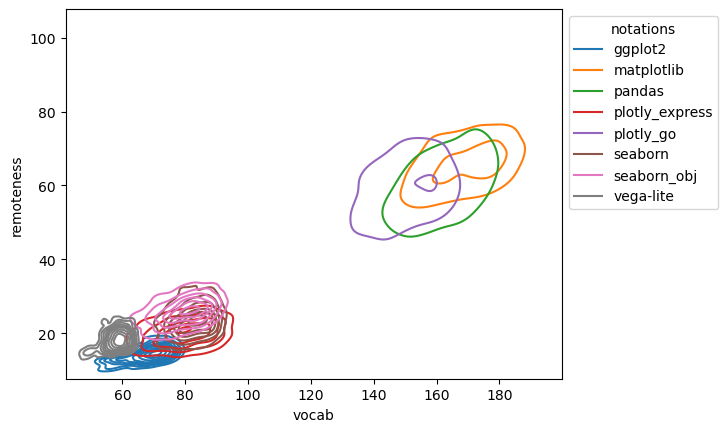

In [27]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(dict(
  vocab=vocab, remoteness=remoteness, notations=notations
))

ax = sns.kdeplot(data=df, x="vocab", y="remoteness", hue="notations")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
